<a href="https://colab.research.google.com/github/Debangshu132/Computer-Vision/blob/master/image_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessery libraries

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
drive.mount("/content/drive", force_remount=True)


In [0]:
ls drive/My\ Drive


In [0]:
!pip install livelossplot

In [0]:
from google.colab.patches import cv2_imshow
from keras.models import Sequential,Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation,Lambda,Input,Add,Dropout
from keras.layers import Conv2D,BatchNormalization,LeakyReLU,Conv2DTranspose,PReLU
from argparse import ArgumentParser

from livelossplot import PlotLossesKeras
from keras.metrics import mean_absolute_error
from keras.optimizers import  Adam
from keras.models import load_model
import keras
import keras
import cv2
import time
import numpy as np
import glob
from keras.callbacks import EarlyStopping,ModelCheckpoint,Callback
import matplotlib.pyplot as plt
import tensorflow as tf
import pprint
import math

tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
pip list

[link text](https:// [link text](https://))Define the constants of the model


In [0]:
scale=2
patch_size=48
TRAINING_FOLDER=["DIV2K_train_HR/"]

VALIDATION_FOLDER=["Set14/"]
batch_size=60
items_to_unzip=['drive/My Drive/train/train.zip',
                'drive/My Drive/Set14.zip','drive/My Drive/train_data.zip',
                 'drive/My Drive/testing_image_folder.zip']
testing_img="drive/My Drive/anuj.jpeg"

Unzip uploaded datas

In [0]:
import zipfile

for item in items_to_unzip:
 with zipfile.ZipFile(item, 'r') as zip_ref:
    zip_ref.extractall()
    print("Done unzipping:", item)

In [0]:

"""image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.9, 1.25],
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5])"""

def extract_patches_single_image_gen(folders,patch_size):
 while True: 
  for folder in folders:
   for img in glob.glob(folder + "*"):
    #print(img)
    img=cv2.imread(img)
    
    #encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), np.random.randint(90, 100)]
    #imag, result= cv2.imencode('.jpg', img, encode_param)
    #img = cv2.imdecode(result, 1)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    img=img[:,:,0]
    shape=img.shape
    assert patch_size<shape[0]
    assert patch_size<shape[1]
    x_start=np.random.randint(0,int(shape[0]-patch_size))
    y_start=np.random.randint(0,int(shape[1]-patch_size))
    #return img[x_start:x_start+patch_size,y_start:y_start+patch_size] 
    img_processed=img[x_start:x_start+patch_size,y_start:y_start+patch_size]
    flipped = cv2.flip(img_processed, np.random.randint(-1, 2))
    yield flipped

def augment_data(single_image):
    flipped = cv2.flip(single_image, np.random.randint(-1, 2))
    return flipped

def reduced(single_image):
    shape=single_image.shape  

    #encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), np.random.randint(30, 90)]
    
    single_image_reduced=cv2.resize(single_image, (single_image.shape[0]//scale,
                                                    single_image.shape[1]//scale)) 
    #imag, result = cv2.imencode('.jpg', single_image_reduced, encode_param)
    #single_image_reduced_result = cv2.imdecode(result, 1)
    #single_image=cv2.resize(single_image_reduced, ( shape[0],shape[1]) )
    return single_image_reduced
    

def batch_generator(folder,batch_size):
  images=extract_patches_single_image_gen(folder,patch_size)
  while True:
        Xbatch = np.zeros((batch_size, patch_size//2, patch_size//2,1))
        Ybatch = np.zeros((batch_size, patch_size, patch_size,1))
        
        for i in range(batch_size):
            single_image=images.__next__()   
            reduced_single_image=reduced(single_image)/255  
            single_image=(single_image)/255  
               
            Xbatch[i,:,:,0]=reduced_single_image
            Ybatch[i,:,:,0]=single_image
        yield Xbatch, Ybatch    
  













"""

        for img in glob.glob(folder + "*"):
            batch_counter = 0
            imageY = cv2.imread(img)
            imageY = cv2.cvtColor(imageY, cv2.COLOR_BGR2YCR_CB)
            imageY=imageY[:,:,0]
            
            #imageY = cv2.GaussianBlur(imageY,(5,5),0)
            #imageY=cv2.resize(imageY, (imageY.shape[0] , imageY.shape[1] ))
            
            
            while batch_counter < batch_size:
                flipped = cv2.flip(imageY, np.random.randint(-1, 2))
                #flipped=imageY
                brightness=1.0*np.random.randint(8, 11)/10
                flipped=flipped*brightness

                Ybatch[batch_counter, :, :, 0] = flipped/ 255
                result=cv2.resize(flipped, (flipped.shape[0]//scale, flipped.shape[1]//scale)) 
                result=cv2.resize(result, ( flipped.shape[1],flipped.shape[0]))
                
                Xbatch[batch_counter, :, :, 0] = result/ 255
                batch_counter += 1
            yield Xbatch, Ybatch
            batch_counter = 0
    """        

'\n\n        for img in glob.glob(folder + "*"):\n            batch_counter = 0\n            imageY = cv2.imread(img)\n            imageY = cv2.cvtColor(imageY, cv2.COLOR_BGR2YCR_CB)\n            imageY=imageY[:,:,0]\n            \n            #imageY = cv2.GaussianBlur(imageY,(5,5),0)\n            #imageY=cv2.resize(imageY, (imageY.shape[0] , imageY.shape[1] ))\n            \n            \n            while batch_counter < batch_size:\n                flipped = cv2.flip(imageY, np.random.randint(-1, 2))\n                #flipped=imageY\n                brightness=1.0*np.random.randint(8, 11)/10\n                flipped=flipped*brightness\n\n                Ybatch[batch_counter, :, :, 0] = flipped/ 255\n                result=cv2.resize(flipped, (flipped.shape[0]//scale, flipped.shape[1]//scale)) \n                result=cv2.resize(result, ( flipped.shape[1],flipped.shape[0]))\n                \n                Xbatch[batch_counter, :, :, 0] = result/ 255\n                batch_counter

Some custom loss and metric functions

In [0]:
def customLoss(y_true,y_pred):
    
     
    return mean_absolute_error(y_true, y_pred)
    #return pow((1/tf.image.psnr(y_true,y_pred,1,name=None)),2)
           #+ pow(1-(tf.image.ssim(y_true,y_pred, max_val=1, filter_size=11,
           #               filter_sigma=1.5, k1=0.01, k2=0.03)),2)
        
def testing_image_gen(folder):
 while True:  
  for img in glob.glob(folder + "*"):
      patch_size_pred=100
      img=cv2.imread(img)
      shape=img.shape 
      x_start=np.random.randint(0,int(shape[0]-patch_size_pred))
      y_start=np.random.randint(0,int(shape[1]-patch_size_pred))
      #return img[x_start:x_start+patch_size,y_start:y_start+patch_size] 
      img=img[x_start:x_start+patch_size_pred,y_start:y_start+patch_size_pred]
      yield img
  
class CustomCallback(Callback):
  def __init__(self,model):
        self.model=model
  def on_train_begin(self, logs={}):
        return
  def on_train_end(self, logs={}):
        return
    
  def on_epoch_begin(self, batch, logs={}):
   model= self.model
   #model.save('model.h5') 
   testing_images=testing_image_gen("testing_image_folder/")
   for i in range(3):
      
      img= testing_images.__next__()
      shape=img.shape 
      original=img
      img = cv2.cvtColor(img , cv2.COLOR_BGR2YCR_CB)
      image_copy=img
      image_copy=cv2.resize(image_copy, ( image_copy.shape[1]*2,image_copy.shape[0]*2) )
      original=cv2.resize(original, ( image_copy.shape[1],image_copy.shape[0]) )  
      img = img [:, :, 0]

      X=np.zeros((1,img.shape[0],img.shape[1],1))
      X[0,:,:,0]=img/255
      prediction = model.predict(X, verbose=0)
      #prediction4 = model.predict(prediction, verbose=1) 
    
      img=prediction[0]
      img =img*255
      img[img<0]=0
      img[img>255] = 255
      image_copy[:,:,0]=img[:,:,0]
      predicted=cv2.cvtColor(image_copy, cv2.COLOR_YCrCb2BGR)
     
     
      vis = np.concatenate((original, predicted), axis=1)
      cv2_imshow(vis )
       
      #cv2_imshow(original)
      #cv2_imshow(predicted)
         
   return 
  def on_batch_begin(self, batch, logs={}):
        return
  def on_batch_end(self, batch, logs={}):
        
        return       
       



def custom_PSNR(y_true,y_pred):
    return tf.image.psnr(y_true,y_pred,1,name=None)
  
def SSIM(y_true,y_pred):
     #igma_value=sigma_generator()
     ssim0_5 = tf.image.ssim(y_true,y_pred, max_val=1, filter_size=11,filter_sigma=0.5,k1=0.01, k2=0.03)
     ssim1 = tf.image.ssim(y_true,y_pred, max_val=1, filter_size=11,filter_sigma=1,k1=0.01, k2=0.03)
     ssim2 = tf.image.ssim(y_true,y_pred, max_val=1, filter_size=11,filter_sigma=2,k1=0.01, k2=0.03)
     ssim4 = tf.image.ssim(y_true,y_pred, max_val=1, filter_size=11,filter_sigma=4,k1=0.01, k2=0.03)
     ssim8 = tf.image.ssim(y_true,y_pred, max_val=1, filter_size=11,filter_sigma=8,k1=0.01, k2=0.03)
     #psnr=tf.image.psnr(y_true,y_pred,1,name=None)
     alpha=0.84 
     #ms_ssim=tf_ms_ssim(y_true,y_pred, mean_metric=True, level=5)
      
     #l1_loss=alpha*mean_absolute_error(y_true,y_pred)
     #print("shape of l is",l1_loss.shape)
     #print("shape of ssim is",ssim.shape)
     mae = np.sum(np.absolute((y_true - y_pred)))
     alpha=0.30  
     avg_ssim=((1-ssim0_5) +   (1-ssim2)+   (1-ssim8))/3 
     #return (1-ssim0_5) +   (1-ssim2)+   (1-ssim4) 
     return 0.3*mae+(0.7)*(avg_ssim)

     #sim = tf.image.ssim(y_true,y_pred, max_val=1, filter_size=11,
     #                    filter_sigma=1.5, k1=0.01, k2=0.03)
     #psnr=tf.image.psnr(y_true,y_pred,1,name=None)
     
     #eturn pow((1-ssim),2)

In [0]:
def SubpixelConv2D(I):
  # Helper function with main phase shift operation
    r=2
    bsize, a, b, c = I.get_shape().as_list()
    X = tf.reshape(I, (bsize, a, b, r, r))
    X = tf.transpose(X, (0, 1, 2, 4, 3))  # bsize, a, b, 1, 1
    X = tf.split(1, a, X)  # a, [bsize, b, r, r]
    X = tf.concat(2, [tf.squeeze(x) for x in X])  # bsize, b, a*r, r
    X = tf.split(1, b, X)  # b, [bsize, a*r, r]
    X = tf.concat(2, [tf.squeeze(x) for x in X])  #
    bsize, a*r, b*r
    return tf.reshape(X, (bsize, a*r, b*r, 1))

The model is defined here

In [0]:
def build_model_big(scale):
    input_layer = Input(shape = (None,None,1))
    conv0 = Conv2D(16, (9,9), activation = 'tanh',padding = "SAME")(input_layer)
    drop1=Dropout(0.1)(conv0)
    conv1 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(drop1)
    drop2=Dropout(0.1)(conv1)
    conv2 = Conv2D(16, (3,3), activation = 'linear', padding = "SAME")(drop2)
    res0=Add()([conv0,conv2])
    

    
    conv2_5=Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(res0)
    drop3=Dropout(0.1)(conv2_5)
    conv3 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(drop3)
    drop4=Dropout(0.1)(conv3)
    conv4 = Conv2D(32, (3,3), activation = 'linear', padding = "SAME")(drop4)
    res1=Add()([conv2_5,conv4])
    
    
    
    conv4_5=Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(res1)
    drop5=Dropout(0.1)(conv4_5)
    conv5 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(drop5)
    drop6=Dropout(0.1)(conv5)
    conv7 = Conv2D(32, (3,3), activation = 'linear', padding = "SAME")(drop6)
    res2=Add()([conv4_5,conv7])
    
    
    conv7_5=Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(res2)
    drop7=Dropout(0.1)(conv7_5)
    conv8 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(drop7)
    drop8=Dropout(0.1)(conv8)
    conv9 = Conv2D(32, (3,3), activation = 'linear', padding = "SAME")(drop8)
    res3=Add()([conv7_5,conv9])
    
    
    conv9_5=Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(res3)
    drop9=Dropout(0.1)(conv9_5)
    conv10 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(drop9)
    drop10=Dropout(0.1)(conv10)
    conv11 = Conv2D(32, (3,3), activation = 'linear', padding = "SAME")(drop10)
    res4=Add()([conv2_5,conv9_5,conv11])
    
    
    conv11_5=Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(res4)
    drop11=Dropout(0.1)(conv11_5)
    conv12 = Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(drop11)
    drop12=Dropout(0.1)(conv12)
    conv13 = Conv2D(64, (3,3), activation = 'linear', padding = "SAME")(drop12)
    res5=Add()([conv11_5,conv13])
    
   

    drop13=Dropout(0.1)(res5)
    conv14 = Conv2D(128, (3,3), activation = 'relu', padding = "SAME")(drop13)
    drop14=Dropout(0.1)(conv14)
    conv1T=Conv2DTranspose(32, (3,3),strides=scale, activation = 'relu', padding = "SAME")(drop14)
    drop15=Dropout(0.1)(conv1T)
    conv2T=Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(drop15)
    
    
    
    conv15 = Conv2D(1, (3,3), activation = 'relu', padding = "SAME")(conv2T)
    model = Model(input_layer,conv15)
    return model

In [0]:
def build_model(scale):
    input_layer = Input(shape = (None,None,1))
    conv0 = Conv2D(32, (9,9), activation = 'relu',padding = "SAME")(input_layer)
    drop1=Dropout(0.1)(conv0)
    #conv1 = Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(conv0)
    #drop2=Dropout(0.1)(conv1)
    conv2 = Conv2D(32, (5,5), activation = 'relu', padding = "SAME")(drop1)
    drop2=Dropout(0.1)(conv2)
    conv3=Conv2D(32, (3,3), activation = 'linear', padding = "SAME")(drop2)
    res0=Add()([conv0,conv3])
    
    """
    
    conv2_5=Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(res0)
    drop3=Dropout(0.1)(conv2_5)
    conv3 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(drop3)
    drop4=Dropout(0.1)(conv3)
    conv4 = Conv2D(32, (3,3), activation = 'linear', padding = "SAME")(drop4)
    res1=Add()([conv2_5,conv4])
    
    
    conv4_5=Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(res1)
    drop3=Dropout(0.1)(conv4_5)
    conv5 = Conv2D(64, (3,3), activation = 'relu', padding = "SAME")(drop3)
    drop4=Dropout(0.1)(conv5)
    conv6 = Conv2D(64, (3,3), activation = 'linear', padding = "SAME")(drop4)
    res2=Add()([conv4_5,conv6])
    
   
    conv7 = Conv2D(120, (3,3), activation = 'relu', padding = "SAME")(res2)
    drop4=Dropout(0.1)(conv7)
    conv8 = Conv2D(120, (3,3), activation = 'linear', padding = "SAME")(drop4)
    res3=Add()([conv0,conv8])

    conv9 = Conv2D(120, (3,3), activation = 'relu', padding = "SAME")(res3)
    drop5=Dropout(0.1)(conv9)
    conv10 = Conv2D(120, (3,3), activation = 'linear', padding = "SAME")(drop5)
    res4=Add()([conv0,conv10])
    

    conv11 = Conv2D(256, (3,3), activation = 'relu', padding = "SAME")(res4)
    conv12 = Conv2D(256, (3,3), activation = 'linear', padding = "SAME")(conv11)
    res5=Add()([conv0,conv10,conv12])"""

    drop3=Dropout(0.1)(res0)
    #conv14 = Conv2D(16, (3,3), activation = 'relu', padding = "SAME")(conv2)
    conv1T=Conv2DTranspose(4, (5,5),strides=scale, activation = 'relu', padding = "SAME")(drop3)
    
    
    conv15 = Conv2D(1, (5,5), activation = 'relu', padding = "SAME")(conv1T)
    model = Model(input_layer,conv15)
    return model

All the execution happens here

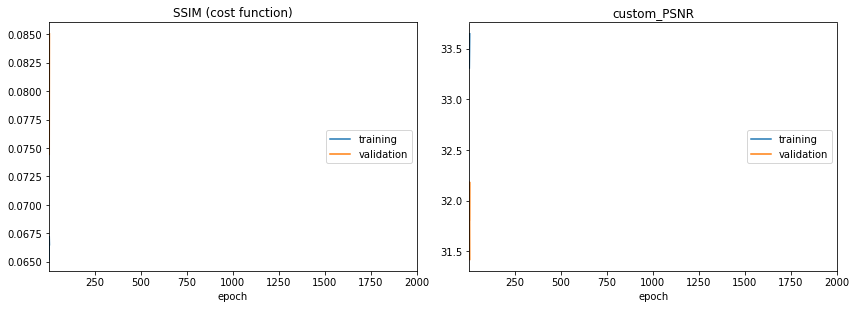

SSIM (cost function):
training   (min:    0.065, max:    0.075, cur:    0.066)
validation (min:    0.074, max:    0.093, cur:    0.085)

custom_PSNR:
training   (min:   30.174, max:   33.647, cur:   33.647)
validation (min:   28.756, max:   32.184, cur:   31.419)
Epoch 6/2000


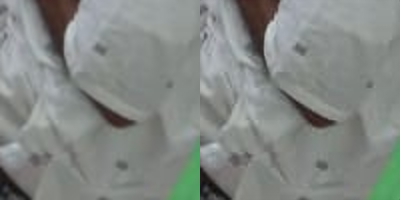

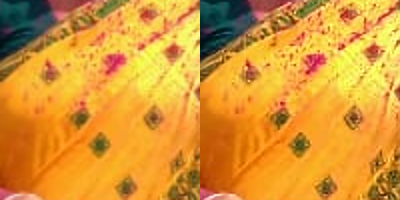

In [0]:
optimizer = Adam(lr=0.0001)
metric={"PSNR":custom_PSNR,'SSIM':SSIM}
#model=load_model('model.h5')
model=build_model(scale)
model.load_weights('model.h5')
show=CustomCallback(model=model)
callbacks = [ModelCheckpoint(filepath='model.h5', monitor='loss',
                             save_best_only=True), show,
                             PlotLossesKeras()]
"""
for i,layer in enumerate(model.layers):
    print(i,layer.name)
for layer in model.layers[:9]:
    layer.trainable=False
for layer in model.layers[9:]:
    layer.trainable=True    
for i,layer in enumerate(model.layers):
    print(i,layer.name,layer.trainable) """
   
model.compile(loss=SSIM, optimizer=optimizer,metrics=[custom_PSNR])
history=model.fit_generator(batch_generator(TRAINING_FOLDER,batch_size),
                             validation_data = batch_generator(VALIDATION_FOLDER,100),validation_steps=1,
                            callbacks=callbacks,samples_per_epoch=(800//batch_size), nb_epoch=2000)

#keras.experimental.export_saved_model(model, "fullmodel.h5")

